<a href="https://colab.research.google.com/github/sunaina5/Linear_Regression/blob/main/Linear_Regression_by_SKLEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#load the data
data = pd.read_csv("/content/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [85]:
print(data.head())


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [86]:
print(data.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [87]:
print(data.isna().sum())

YearsExperience    0
Salary             0
dtype: int64


In [88]:
print(data.dropna())

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [89]:
print(data.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


In [90]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes
None


In [91]:
data = data.values
X_data = data[:,0]
Y_data = data[:,1]
print(X_data)
print(Y_data)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

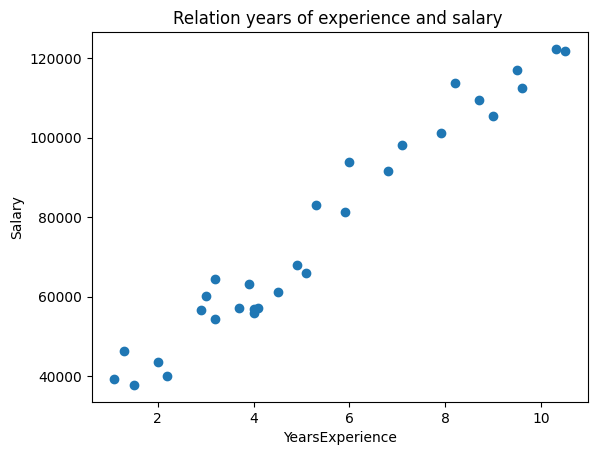

In [92]:
plt.scatter(X_data,Y_data)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Relation years of experience and salary ")
plt.plot

In [93]:
X = X_data.reshape(-1,1)
Y = Y_data.reshape(-1,1)

In [94]:
import sklearn
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [96]:
#Reshaping the input data is necessary in this case because StandardScaler expects a 2D array as input.

#When working with scikit-learn, it is common for data to be represented as a 2D array or matrix,
#even if it contains only a single feature or sample. Reshaping the data to have the appropriate dimensions ensures compatibility with scikit-learn's API.#
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Reshape X_train to 2D array
X_train_scaled = scaler.transform(X_train)
Y_train_scaled = scaler.transform(Y_train)  # Reshape Y_train to 2D array


In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train_scaled)

LinearRegression()

In [99]:
Y_pred = lr.predict(X_test.reshape(-1,1))
print(Y_pred.shape)

(6, 1)


In [100]:
Y_test.reshape(-1,1)


array([[ 60150.],
       [ 91738.],
       [101302.],
       [ 67938.],
       [ 39891.],
       [ 54445.]])

In [101]:
lr.score(X_test,Y_test)*100

95.87275042539626

In [110]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(Y_test,Y_pred))

0.9587275042539626


In [102]:
print(X.shape)
print(Y.shape)
print(Y_pred.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(30, 1)
(30, 1)
(6, 1)
(24, 1)
(6, 1)
(24, 1)
(6, 1)


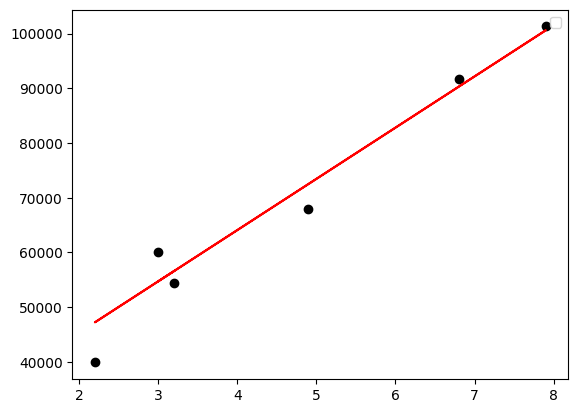

In [105]:
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, Y_pred, color="red")
plt.legend()
plt.show()


In [112]:
df2=pd.DataFrame({'actual':Y_test.flatten(),'prediction':Y_pred.flatten()})
df2

,actual,prediction
0,60150.0,54719.131335
1,91738.0,90306.282427
2,101302.0,100607.826164
3,67938.0,72512.706881
4,39891.0,47227.099526
5,54445.0,56592.139287


<Axes: >

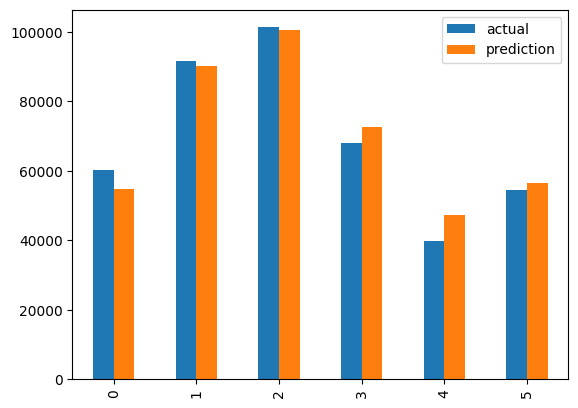

In [113]:
df2.plot(kind='bar')